In [263]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import data

In [264]:
douban = pd.read_csv('Douban Top 250.csv', encoding = 'utf8')

In [265]:
imdb = pd.read_csv('imdb_top250_movies.csv', encoding = 'utf8')

Clean and prepare the data.

In [266]:
columns_to_drop = ['Const', 'Created','Modified','Description' , 'URL', 'Title Type' ]
douban = douban.drop(columns_to_drop, axis=1)

In [267]:
douban = douban.rename(columns = {'Position':'Douban Ranking', 'Num Votes':'Douban Votes'})

In [268]:
douban = douban.dropna()

In [269]:
douban['Douban Ranking'] = pd.to_numeric(douban['Douban Ranking'], downcast='integer')

In [270]:
douban['Douban Votes'] = pd.to_numeric(douban['Douban Votes'], downcast='integer')

In [271]:
douban.head()

,Douban Ranking,Title,Douban Rating,Runtime (mins),Year,Genres,Douban Votes,Release Date,Directors
0,1,The Shawshank Redemption,9.7,142.0,1994.0,Drama,2671272,1994/9/10,Frank Darabont
1,2,Léon,9.6,110.0,1994.0,"Action, Crime, Drama, Thriller",1158832,1994/9/14,Luc Besson
2,3,Ba wang bie ji,9.5,171.0,1993.0,"Drama, Music, Romance",29596,1993/1/1,Kaige Chen
3,4,Forrest Gump,9.4,142.0,1994.0,"Drama, Romance",2071285,1994/6/23,Robert Zemeckis
4,5,La vita è bella,9.5,116.0,1997.0,"Comedy, Drama, Romance, War",694346,1997/12/20,Roberto Benigni


In [272]:
columns_to_drop2 = ['Unnamed: 0', 'imdbID','DVD','BoxOffice','Website','Writer', 'Actors','Plot']
imdb = imdb.drop(columns_to_drop2, axis=1)

In [273]:
imdb = imdb.rename(columns = {'Num':'IMDb Ranking', 'imdbRating':'IMDb Rating', 'Genre':'Genres',
                              'Released':'Release Date','imdbVotes':'IMDb Votes', 'Runtime':'Runtime (mins)'})

In [274]:
imdb['Runtime (mins)'] = imdb['Runtime (mins)'].str.replace('min', '')

In [275]:
imdb = imdb.dropna()

In [277]:
imdb['IMDb Votes'] = imdb['IMDb Votes'].str.replace(',', '')

In [282]:
imdb['IMDb Votes']  = pd.to_numeric(imdb['IMDb Votes'] , downcast='integer')

In [283]:
imdb.head()

,IMDb Ranking,Title,Year,Release Date,Runtime (mins),Genres,Director,Language,Country,Awards,Metascore,IMDb Rating,IMDb Votes,Type,Production
0,1,The Shawshank Redemption,1994,14 Oct 1994,142,"Crime, Drama",Frank Darabont,English,USA,Nominated for 7 Oscars. Another 19 wins & 30 n...,80.0,9.3,1825626,movie,Columbia Pictures
1,2,The Godfather,1972,24 Mar 1972,175,"Crime, Drama",Francis Ford Coppola,"English, Italian, Latin",USA,Won 3 Oscars. Another 23 wins & 27 nominations.,100.0,9.2,1243444,movie,Paramount Pictures
2,3,The Godfather: Part II,1974,20 Dec 1974,202,"Crime, Drama",Francis Ford Coppola,"English, Italian, Spanish, Latin, Sicilian",USA,Won 6 Oscars. Another 10 wins & 20 nominations.,85.0,9.0,856870,movie,Paramount Pictures
3,4,The Dark Knight,2008,18 Jul 2008,152,"Action, Crime, Drama",Christopher Nolan,"English, Mandarin","USA, UK",Won 2 Oscars. Another 151 wins & 153 nominations.,82.0,9.0,1802351,movie,Warner Bros. Pictures/Legendary
4,5,12 Angry Men,1957,01 Apr 1957,96,"Crime, Drama",Sidney Lumet,English,USA,Nominated for 3 Oscars. Another 16 wins & 8 no...,96.0,8.9,494215,movie,Criterion Collection


In [285]:
films = douban.merge(imdb, on='Title')

In [286]:
films_clean = films.reindex(columns = ['Title', 'Douban Rating', 'Douban Ranking', 'IMDb Rating', 'IMDb Ranking', 'Douban Votes', 'IMDb Votes'])

In [287]:
films_clean

,Title,Douban Rating,Douban Ranking,IMDb Rating,IMDb Ranking,Douban Votes,IMDb Votes
0,The Shawshank Redemption,9.7,1,9.3,1,2671272,1825626
1,Forrest Gump,9.4,4,8.8,11,2071285,1365937
2,Schindler's List,9.4,7,8.9,6,1352326,937837
3,WALL·E,9.3,9,8.4,53,1114058,782275
4,Inception,9.4,10,8.8,13,2343541,1592306
...,...,...,...,...,...,...,...
66,Sin City,8.5,232,8.0,216,770584,685825
67,The King's Speech,8.6,233,8.0,230,681702,537662
68,Blood Diamond,8.7,234,8.0,235,551335,424781
69,Whiplash,8.4,236,8.5,36,857251,485079


EDA

To see how many films appear on both IMDb's and Douban's Top 250 Movies lists

In [175]:
!pip install matplotlib-venn

import matplotlib_venn as venn

In [176]:
titles_1 = set(douban['Title'])
titles_2 = set(imdb['Title'])

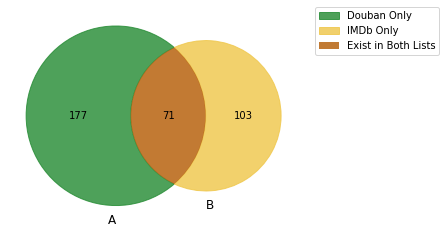

In [216]:
v = venn.venn2([titles_1, titles_2])

v1 = v.get_patch_by_id('10')
v2 = v.get_patch_by_id('01')
v3 = v.get_patch_by_id('11')

v1.set_color('#228A31')
v2.set_color('#EFC648')


v1.set_alpha(0.8)
v2.set_alpha(0.8)
v3.set_alpha(0.8)

plt.legend([v1, v2, v3], ['Douban Only', 'IMDb Only', 'Exist in Both Lists'], bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

To eexplore the differences in the ratings of films on the two lists

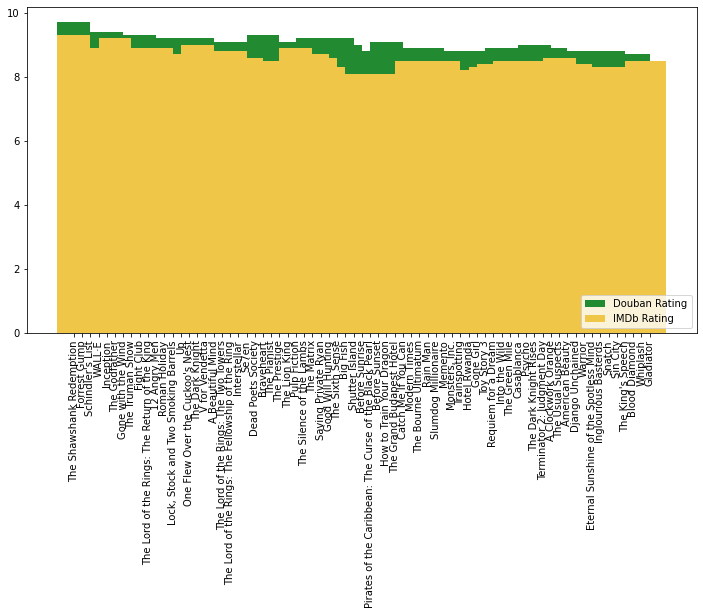

In [171]:
plt.figure(figsize=(12, 6))
x_pos = range(len(films_clean))
titles = films_clean['Title']
douban_ratings = films_clean['Douban Rating']
imdb_ratings = films_clean['IMDb Rating']

plt.bar(titles, douban_ratings, width=4, label='Douban Rating', color = '#228A31')
plt.bar(titles, imdb_ratings, width=4, label='IMDb Rating', color = '#EFC648')

plt.legend(loc = 'lower right')
plt.xticks(x_pos, x_values, rotation = 90)
plt.show()

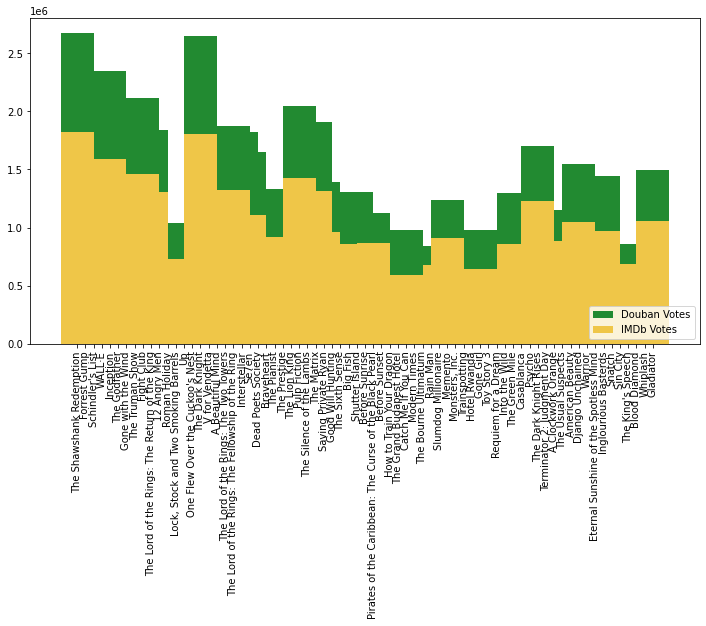

In [288]:
plt.figure(figsize=(12, 6))
x_pos = range(len(films_clean))
titles = films_clean['Title']
douban_votes = films_clean['Douban Votes']
imdb_votes = films_clean['IMDb Votes']

plt.bar(titles, douban_votes, width=4, label='Douban Votes', color = '#228A31')
plt.bar(titles, imdb_votes, width=4, label='IMDb Votes', color = '#EFC648')

plt.legend(loc = 'lower right')
plt.xticks(x_pos, x_values, rotation = 90)
plt.show()

The first graph shows that there is a significant difference between the Douban and IMDb Top 250 lists, with less than a third of the films appearing on both lists. 
The second graph shows that Douban's ratings are generally higher than those on IMDb, and that more people rate Douban than IMDb, perhaps because Douban itself is more of a rating site than IMDb.

This also indicates that perhaps Rotten Tomatoes would be more appropriate to study the difference in movie ratings. 